In [1]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate, Masking
from keras.models import Model, Sequential
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
base_dir = '/home/vaibhavpawar/codes/online/'

In [7]:
#load data
mid = pd.read_csv(base_dir + 'mid.csv', header=None)
tid = pd.read_csv(base_dir + 'tid.csv', header=None)
ton = pd.read_csv(base_dir + 'ton.csv', header=None)
fecom = pd.read_csv(base_dir + 'fecom.csv', header=None)

In [22]:
mid1 = np.array(mid[0:1000])
tid1 = np.array(tid[0:1000])
ton1 = np.array(ton[0:1000])
fecom1 = np.array(fecom[0:1000])

In [24]:
mid1 = np.loadtxt(base_dir + 'mid.csv', dtype='int32', delimiter=',')

In [29]:
tid1 = np.loadtxt(base_dir + 'tid.csv', dtype='int32', delimiter=',')
ton1 = np.loadtxt(base_dir + 'ton.csv', dtype='int32', delimiter=',')
fecom1 = np.loadtxt(base_dir + 'fecom.csv', dtype='int32', delimiter=',')

In [27]:
mid.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,8,9,10,14,13,16,8,10,8,8,8,8,8,8,8,8,8,8,8
1,0,0,0,0,8,8,8,10,7,10,14,8,9,10,14,15,9,9,15
2,0,0,0,0,8,13,11,7,12,7,7,16,9,7,8,8,8,12,13
3,12,8,7,16,15,15,15,28,8,8,8,8,8,8,8,8,8,8,8
4,14,10,13,14,8,9,8,13,8,8,8,8,8,8,8,8,8,8,8


In [45]:
indices = np.arange(mid1.shape[0])
np.random.shuffle(indices)

tr_pct = 0.7
vl_pct = 0.2

tr_nrec = int(tr_pct*mid1.shape[0])
vl_nrec = int(vl_pct*mid1.shape[0])
ts_nrec = mid1.shape[0] - (tr_nrec + vl_nrec)

tr_indices = indices[0:tr_nrec]
vl_indices = indices[tr_nrec:tr_nrec+vl_nrec]
ts_indices = indices[-ts_nrec:]

In [36]:
print tr_nrec
print len(tr_indices)
print vl_nrec
print len(vl_indices)
print ts_nrec
print len(ts_indices)

2455994
2455994
701712
701712
350857
350857


In [46]:
mid2 = mid1[indices]

In [47]:
mid1[0:10,:]

array([[ 8,  9, 10, 14, 13, 16,  8, 10,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8],
       [ 0,  0,  0,  0,  8,  8,  8, 10,  7, 10, 14,  8,  9, 10, 14, 15,  9,
         9, 15],
       [ 0,  0,  0,  0,  8, 13, 11,  7, 12,  7,  7, 16,  9,  7,  8,  8,  8,
        12, 13],
       [12,  8,  7, 16, 15, 15, 15, 28,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8],
       [14, 10, 13, 14,  8,  9,  8, 13,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8],
       [ 0,  0,  0,  0, 33, 20, 30, 33, 29, 20, 18, 29, 24, 18, 26,  2, 37,
        20, 18],
       [13, 16,  9,  7, 12,  9, 11, 10,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8],
       [ 0,  0,  0,  0,  0, 37, 30, 33,  2,  7,  8,  2, 21, 25, 17, 28, 17,
        26, 17],
       [ 0,  0,  0,  0,  8,  8,  8,  7, 12,  8, 10, 12, 15, 13,  7, 10,  7,
         8, 10],
       [ 0,  0,  0,  0, 34, 25, 35, 20, 40,  2, 17, 36, 37, 30, 28, 30, 37,
        24, 39]], dtype=int32)

In [48]:
mid2[0:10,:]

array([[ 0,  0,  0,  0, 12, 13,  8,  8,  8,  8,  8, 13,  9,  7,  9, 15, 12,
        10,  8],
       [ 0,  0,  0,  0,  0,  0, 17, 28, 17, 42, 30, 31,  2, 34, 20, 29, 29,
        20, 35],
       [ 0,  0,  0,  0, 12, 13,  8,  8,  8,  8,  8, 11,  8, 14,  7, 15, 11,
        13, 10],
       [ 0,  0,  0,  0,  8,  8,  8,  8,  8,  8,  7, 10, 10, 12, 12, 16, 10,
        21,  7],
       [ 0,  0,  0,  0,  8,  9, 13,  8, 12, 12,  8,  9, 10, 13,  8,  8,  8,
         9,  8],
       [12,  8, 15, 13,  7, 10, 14, 10,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8],
       [ 0,  0,  0,  0, 31, 24, 35, 17, 31, 37, 17, 35,  2, 37, 20, 29,  2,
        34, 20],
       [ 0,  0,  0,  0, 12, 10, 28, 34,  8,  8,  8,  8,  8,  8, 14, 10, 10,
        14,  8],
       [ 7, 10, 11, 11,  8,  8,  9, 10,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8],
       [ 0,  0,  0,  0, 12, 13,  8,  8,  8,  8,  8, 13, 12, 13,  7,  8,  9,
         7,  8]], dtype=int32)

In [11]:
time_steps1 = 19
onehot_vec_size1 = 42
time_steps2 = 16
onehot_vec_size2 = 37
time_steps3 = 22
onehot_vec_size3 = 50

lstm_size1 = 32
lstm_size2 = 32
lstm_size3 = 32

input1 = Input(shape=(time_steps1,), dtype='int32', name = 'input1')
input2 = Input(shape=(time_steps2,), dtype='int32', name = 'input2')
input3 = Input(shape=(time_steps3,), dtype='int32', name = 'input3')

# embedding layer to convert into one-hot encoded vector
# 0 is mapped to all zeros - this will be ignored when masked
# hence, 1st row of embedding matrix is all zero
# rest of the matrix is just an identity matrix
# this matrix is marked as non-trainable 

embedding_matrix1 = np.zeros((onehot_vec_size1 + 1, onehot_vec_size1))
embedding_matrix1[1:,:] = np.identity(onehot_vec_size1)

embedding_matrix2 = np.zeros((onehot_vec_size2 + 1, onehot_vec_size2))
embedding_matrix2[1:,:] = np.identity(onehot_vec_size2)

embedding_matrix3 = np.zeros((onehot_vec_size3 + 1, onehot_vec_size3))
embedding_matrix3[1:,:] = np.identity(onehot_vec_size3)

embedding_layer1 = Embedding(onehot_vec_size1 + 1,
                            onehot_vec_size1,
                            weights=[embedding_matrix1],
                            input_length=time_steps1,
                            trainable=False)

embedding_layer2 = Embedding(onehot_vec_size2 + 1,
                            onehot_vec_size2,
                            weights=[embedding_matrix2],
                            input_length=time_steps2,
                            trainable=False)

embedding_layer3 = Embedding(onehot_vec_size3 + 1,
                            onehot_vec_size3,
                            weights=[embedding_matrix3],
                            input_length=time_steps3,
                            trainable=False)

embedded_sequences1 = embedding_layer1(input1)
embedded_sequences2 = embedding_layer2(input2)
embedded_sequences3 = embedding_layer3(input3)

lstm1 = LSTM(lstm_size1, dropout=0.2, recurrent_dropout=0.2)
lstm2 = LSTM(lstm_size2, dropout=0.2, recurrent_dropout=0.2)
lstm3 = LSTM(lstm_size3, dropout=0.2, recurrent_dropout=0.2)

y1 = Masking(mask_value=0.0)(embedded_sequences1)
y2 = Masking(mask_value=0.0)(embedded_sequences2)
y3 = Masking(mask_value=0.0)(embedded_sequences3)

#sequence_out, y1h, state_c = lstm1(y1)
y1 = lstm1(y1)
y2 = lstm2(y2)
y3 = lstm3(y3)

y = concatenate([y1, y2, y3], axis=-1)
y = Dense(1, activation='sigmoid')(y)

model = Model(inputs = [input1, input2, input3], outputs = y)

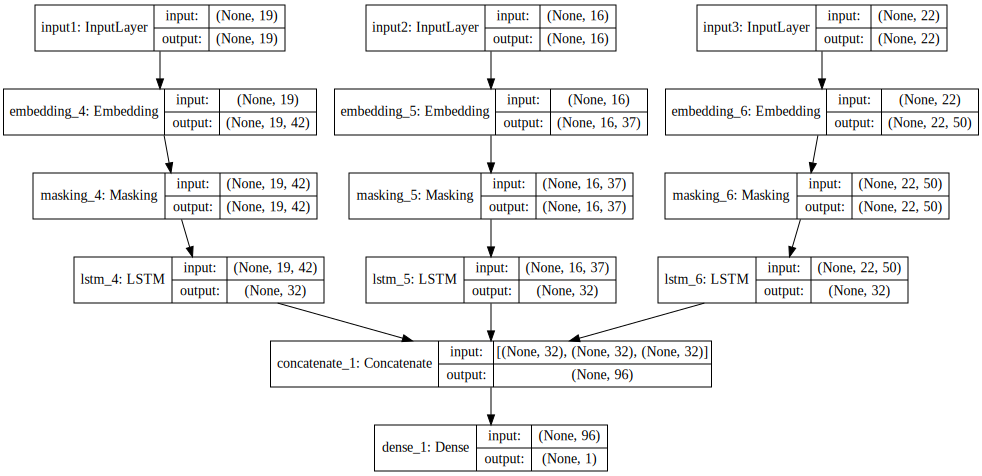

In [12]:
from keras.utils import plot_model
import pydot
pydot.find_graphviz = lambda: True

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [30]:
model.fit([mid1, tid1, ton1], fecom1,
          batch_size=32,
          epochs=1)

Epoch 1/1
3508563/3508563 [==============================] - 13183s - loss: 0.0140 - acc: 0.9960 - ETA: 
